Import Libraries

In [27]:
import geopandas as gpd
import matplotlib.pyplot as plt
import rasterio
from rasterio import features
from rasterio.enums import MergeAlg
from rasterio.plot import show
from numpy import int16
import pyproj

Import wootton courtney tithe map image as single (grayscale) band image and its equivilent vector line file (its mask)

In [36]:
from rasterio.warp import calculate_default_transform, reproject, Resampling

vector = gpd.read_file('C:/Users/44793/Desktop/Historic Map Database/HolnicoteTitheMaps/ManualBoundaryMasks/WoottonCourtneyManualBoundaryMask.shp')
print(vector.crs)

geom = [shapes for shapes in vector.geometry]

raster = rasterio.open("TitheTrainingFullImage.tif")
print(raster.crs)


EPSG:27700
LOCAL_CS["OSGB36 / British National Grid",UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]


In [37]:
# Rasterize vector using the shape and coordinate system of the raster
mask = features.rasterize(geom,
                                out_shape = raster.shape,
                                fill = 0,
                                out = None,
                                transform = raster.transform,
                                all_touched = False,
                                default_value = 1,
                                dtype = None)

# Plot raster
#fig, ax = plt.subplots(1, figsize = (4, 10))
#show(mask, ax = ax)
#plt.gca().invert_yaxis()

c:\Users\44793\anaconda3\envs\geospatial\Lib\site-packages\rasterio\features.py:336: ShapeSkipWarning: Invalid or empty shape None at index 335 will not be rasterized.
  warnings.warn(


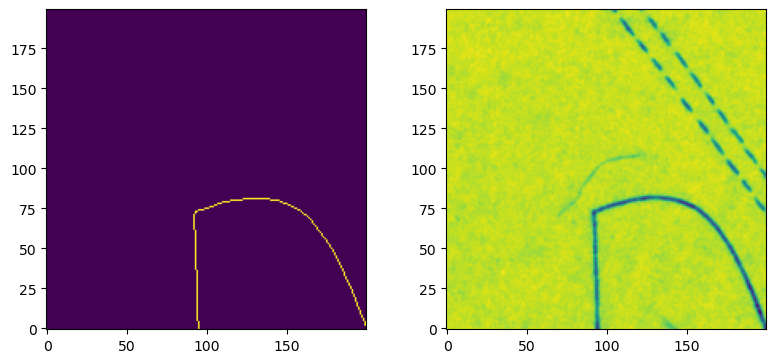

In [38]:
# Define the zoomed-in section (row and column indices)
row_start, row_end = 3700, 3900
col_start, col_end = 3700, 3900

# Plot the zoomed-in section
fig, ax = plt.subplots(2, figsize=(4, 8))
show(mask[row_start:row_end, col_start:col_end], ax=ax[0])
show(raster.read(1)[row_start:row_end, col_start:col_end], ax=ax[1])
ax[0].invert_yaxis()
ax[1].invert_yaxis()
plt.tight_layout()
fig.set_size_inches(8, 4)
ax[0].set_position([0.05, 0.1, 0.4, 0.8])
ax[1].set_position([0.55, 0.1, 0.4, 0.8])


In [39]:
#Save rasterised single-pixel boundary mask 


with rasterio.open(
    "TitheTrainingMask.tif",
    "w",
    driver="GTiff",
    height=mask.shape[0],
    width=mask.shape[1],
    count=1,
    dtype=mask.dtype,
    crs=raster.crs,
    transform=raster.transform,
) as dst:
    dst.write(mask, 1)

In [ ]:
mask_scaled = mask * 255  # Scale 1s to 255 to visually inspect for errors

with rasterio.open(
    "TitheTrainingMaskVisable.tif",
    "w",
    driver="GTiff",
    height=mask.shape[0],
    width=mask.shape[1],
    count=1,
    dtype='uint8',  # Explicitly set to uint8
    crs=raster.crs,
    transform=raster.transform,
) as dst:
    dst.write(mask_scaled.astype('uint8'), 1)